In [1]:
# Visualización de las columnas
import numpy as np
import pandas as pd

archivo = "precios_mundiales_petroleo.csv"
df = pd.read_csv(archivo, delimiter=";")
df.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56


In [2]:
# Filtrado inicial
df = df.replace(',','', regex=True)
baratos = df.loc[df['Price Per Liter (USD)'].astype(float) <= 0.90]
bajo_ranking = df.loc[df['S#'].astype(int) >= 50]
df[(df['Price Per Liter (USD)'].astype(float) <= 0.90) & (df['S#'].astype(int) >= 50)].head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
49,50,Libya,223,0%,526.6,0.12,0.03,6.56
51,52,Qatar,172,0%,993.4,2.18,0.58,121.82
57,58,Turkmenistan,149,0%,403.4,1.62,0.43,90.52
61,62,Oman,183,0%,626.3,2.35,0.62,131.34
68,69,Angola,133,0%,70.7,1.39,0.37,77.83


In [3]:
df['World Share'] = df['World Share'].str.rstrip('%').astype(float)
df.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR)
0,1,United States,19687287,20.0,934.3,5.19,1.37,289.97
1,2,China,12791553,13.0,138.7,5.42,1.43,302.87
2,3,India,4443000,5.0,51.4,5.05,1.33,281.93
3,4,Japan,4012877,4.0,481.5,4.69,1.24,262.05
4,5,Russia,3631287,4.0,383.2,3.41,0.90,190.56


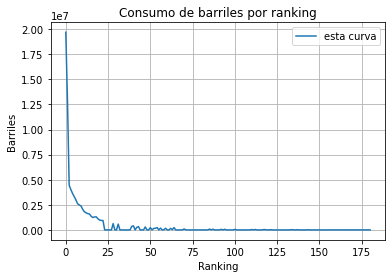

In [4]:
# Visualización de gráficas
import matplotlib.pyplot as plt
%matplotlib inline
df['Daily Oil Consumption (Barrels)'].astype(float).plot()
plt.grid(True)
plt.xlabel("Ranking")
plt.ylabel("Barriles")
plt.title("Consumo de barriles por ranking")
plt.legend(["esta curva"])

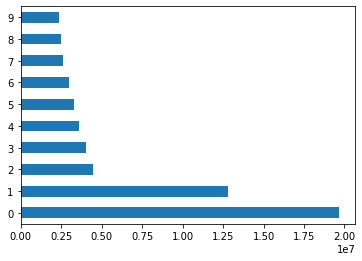

In [5]:
alto_ranking = df.loc[df['S#'].astype(int) <= 10]
alto_ranking['Daily Oil Consumption (Barrels)'].astype(float).plot(kind="barh")

(array([1, 2, 3, 4, 5]), <a list of 5 Text major ticklabel objects>)

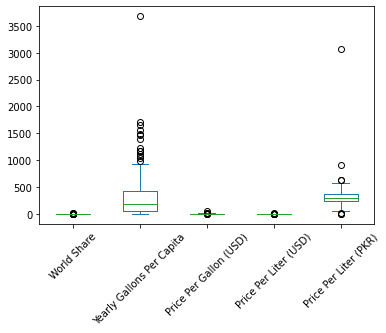

In [6]:
df_sin_pais = df.loc[ : , df.columns != 'Country']
df_sin_varios = df.loc[:, ~df.columns.isin(['S#', 'Country', 'Daily Oil Consumption (Barrels)'])]
df_sin_varios.astype(float).plot(kind="box")
plt.xticks(rotation=45)

([<matplotlib.patches.Wedge at 0x7f2aceb1ea10>,
 [Text(0.8426488837530798, 0.70706637503822, 'United States'),
  Text(-0.30320112329863347, 1.0573878563849914, 'China'),
  Text(-0.866811863664908, 0.6772275784474294, 'India'),
  Text(-1.0336619039013282, 0.3762220998600182, 'Japan'),
  Text(-1.0973204600952138, 0.0767320523407823, 'Russia'),
  Text(-1.0832885146520927, -0.19101307291089453, 'Saudi Arabia'),
  Text(-1.019902206051171, -0.41206733684187424, 'Brazil'),
  Text(-0.911941272379557, -0.6151122789627556, 'South Korea'),
  Text(-0.7641241249831051, -0.7912738600628761, 'Canada'),
  Text(-0.5829110831798087, -0.9328529729309664, 'Germany'),
  Text(-0.41206712795719375, -1.0199022904460553, 'Mexico'),
  Text(-0.26611395094781337, -1.0673253323663525, 'Iran'),
  Text(-0.11498116833293322, -1.093974099752272, 'France'),
  Text(0.038389592042613406, -1.099329904634092, 'Indonesia'),
  Text(0.19101314264043762, -1.0832885023568857, 'United Kingdom'),
  Text(0.30320123776714536, -1.05

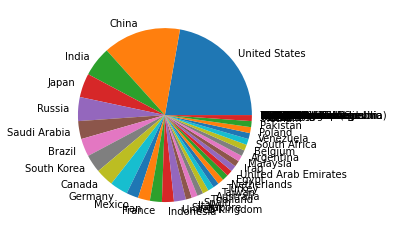

In [7]:
paises = list(df['Country'])
valores = list(df['World Share'])
plt.pie(valores, labels = paises)

(array([ 1.,  4., 20., 21., 26., 21., 12.,  9.,  4.,  5.,  3.,  8.,  6.,
         5.,  9.,  4., 11.,  8.,  2.,  2.]),
 array([0.30103   , 0.65068779, 1.00034558, 1.35000338, 1.69966117,
        2.04931896, 2.39897676, 2.74863455, 3.09829235, 3.44795014,
        3.79760793, 4.14726573, 4.49692352, 4.84658132, 5.19623911,
        5.5458969 , 5.8955547 , 6.24521249, 6.59487028, 6.94452808,
        7.29418587]),
 <a list of 20 Patch objects>)

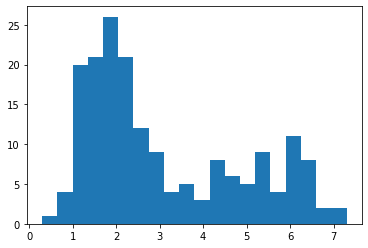

In [15]:
plt.hist(np.log10(df['Daily Oil Consumption (Barrels)'].astype(float).values), bins=20)

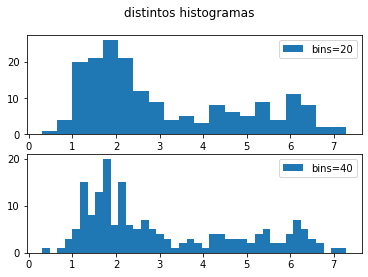

In [17]:
fig, (ax1, ax2) = plt.subplots(2,1)
fig.suptitle('distintos histogramas')
ax1.hist(np.log10(df['Daily Oil Consumption (Barrels)'].astype(float).values), bins=20)
ax1.legend(["bins=20"])
ax2.hist(np.log10(df['Daily Oil Consumption (Barrels)'].astype(float).values), bins=40)
ax2.legend(["bins=40"])

Text(0.5, 0.98, 'muchos histogramas')

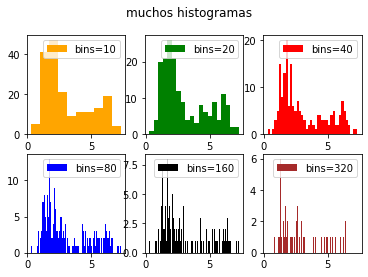

In [20]:
filas = 2
columnas = 3
cajitas = 10
contador = 0
colores = ['orange', 'green', 'red', 'blue', 'black', 'brown']
fig, axs = plt.subplots(filas, columnas)
for fil in range(filas):
  for col in range(columnas):
    axs[fil, col].hist(np.log10(df['Daily Oil Consumption (Barrels)'].astype(float).values), bins=cajitas, color=colores[contador])
    axs[fil, col].legend(["bins=" + str(cajitas)])
    cajitas *= 2
    contador += 1
fig.suptitle("muchos histogramas")